In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Gather

In [2]:
df = pd.read_csv('data/raw_data.csv')

## Assess

In [3]:
df.head()

,school_id,state,geographic_school_district,children_5_17_saipe_estimate,poverty_saipe_estimate,single_parent_estimate,single_parent_margin_of_error,hhs_with_vulnerable_job_estimate,vulnerable_job_margin_of_error,crowded_conditions_estimate,hh_with_crowded_conditions_margin_of_error,no_computer_or_internet_estimate,no_computer_or_internet_margin_of_error,children_with_disability,children_with_disability_margin_of_error,linguistically_isolated_children,linguistically_isolated_children_margin_of_error
0,1,Alabama,Fort Rucker School District,985,0.124424,0.048975,0%-10%,0.327559,20%-46%,0.028090,0%-8%,0.020489,0%-5%,0.032487,0%-6%,0.000000,0%-3%
1,3,Alabama,Maxwell AFB School District,292,0.152263,0.101887,3%-17%,0.306513,4%-57%,0.009967,0%-10%,0.014528,0%-6%,0.054795,2%-9%,0.000000,0%-8%
2,5,Alabama,Albertville City School District,4591,0.300538,0.352926,26%-44%,0.326535,28%-37%,0.047664,3%-7%,0.221471,13%-32%,0.018079,0%-3%,0.173601,10%-24%
3,6,Alabama,Marshall County School District,8299,0.266222,0.295197,24%-35%,0.234867,21%-26%,0.026383,2%-3%,0.142486,11%-18%,0.043499,3%-6%,0.038679,1%-7%
4,7,Alabama,Hoover City School District,15397,0.072596,0.208316,17%-25%,0.292165,27%-31%,0.015485,1%-2%,0.031688,1%-5%,0.038774,2%-5%,0.044164,1%-8%


## Clean

In [4]:
grouped_df = df.groupby('state')

## Analyze

### Which state has the most students with a parent working in a vulnerable economic sector?  

In [23]:
vulnerable_sector = grouped_df.mean()["hhs_with_vulnerable_job_estimate"].sort_values(ascending=False).head(10).to_frame()
vulnerable_sector.style.format('{:.2%}')

,hhs_with_vulnerable_job_estimate
state,
Hawaii,34.56%
Puerto Rico,31.22%
Florida,31.12%
Arizona,30.30%
Nevada,29.39%
Utah,29.34%
Rhode Island,29.30%
Delaware,28.66%
North Carolina,28.56%


### Which state has the most students living in crowded conditions?

In [22]:
crowded = grouped_df.mean()["crowded_conditions_estimate"].sort_values(ascending=False).head(10).to_frame()
crowded.style.format('{:.2%}')

,crowded_conditions_estimate
state,
Alaska,13.35%
Hawaii,9.06%
California,6.84%
Arizona,5.76%
Texas,4.06%
Washington,3.87%
District of Columbia,3.61%
Idaho,3.54%
Utah,3.45%


### Which state has the most students without computer or internet access?

In [29]:
lack_computer = grouped_df.mean()["no_computer_or_internet_estimate"].sort_values(ascending=False).head(10).to_frame()
lack_computer.style.format('{:.2%}')

,no_computer_or_internet_estimate
state,
Puerto Rico,31.60%
Mississippi,26.76%
New Mexico,26.00%
Arkansas,23.82%
Louisiana,23.57%
Georgia,21.81%
Oklahoma,21.69%
South Carolina,21.11%
District of Columbia,20.97%


## Visualize

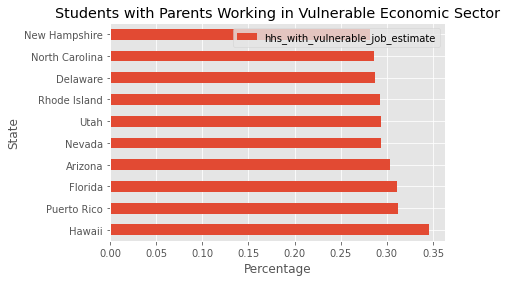

In [26]:
plt.style.use('ggplot')

vulnerable_sector.plot.barh()

plt.title('Students with Parents Working in Vulnerable Economic Sector')
plt.ylabel('State')
plt.xlabel('Percentage')
plt.show()

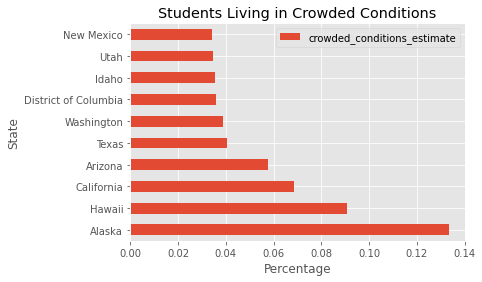

In [27]:
crowded.plot.barh()

plt.title('Students Living in Crowded Conditions')
plt.ylabel('State')
plt.xlabel('Percentage')
plt.show()

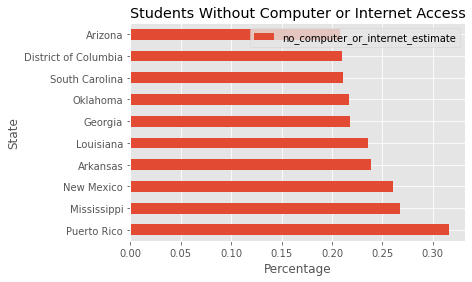

In [28]:
lack_computer.plot.barh()

plt.title('Students Without Computer or Internet Access')
plt.ylabel('State')
plt.xlabel('Percentage')
plt.show()